<a href="https://colab.research.google.com/github/Mdrashid11/machine-learning/blob/main/Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
# Import dataset
data=pd.read_csv("realest.csv")

In [6]:
# Handle missing values by imputing the mean for numerical columns
imputer = SimpleImputer(strategy="mean")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [7]:
# Separate features and target variable
X = data_imputed.drop(columns=["Price"])
y = data_imputed["Price"]

In [8]:
# Separate features and target variable
X = data_imputed.drop(columns=["Price"])
y = data_imputed["Price"]

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize the feature data to improve SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# Create the SVM model (Support Vector Regressor)
svm_model = SVR(kernel='rbf', C=100, gamma='auto')  # You can adjust parameters as needed

In [12]:
# Train the model
svm_model.fit(X_train, y_train)

SVR(C=100, gamma='auto')

In [13]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 13.32446118400194
R-squared Score: 0.92109685033646


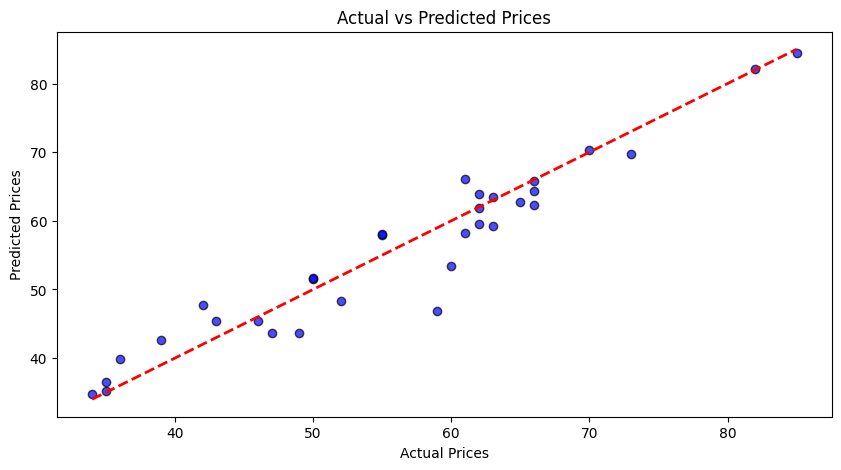

In [16]:
# 1. Scatter Plot: Predicted vs Actual Prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

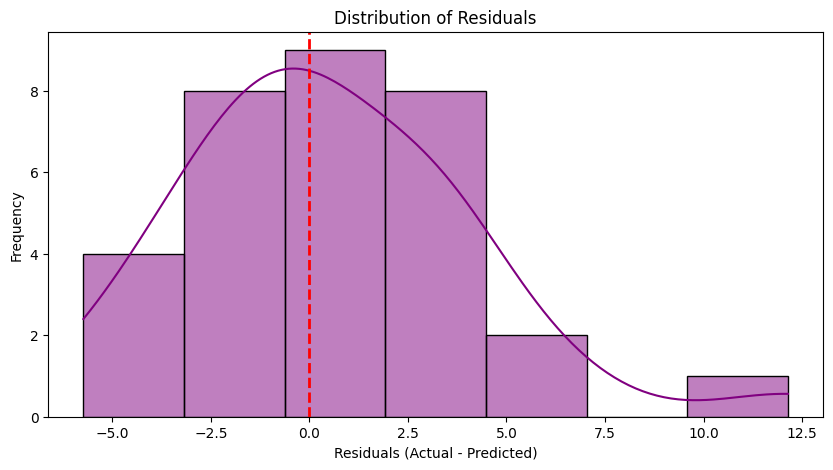

In [17]:
# 2. Residual Plot: Errors between Predicted and Actual Prices
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color="purple")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.axvline(x=0, color="red", linestyle="--", lw=2)
plt.show()

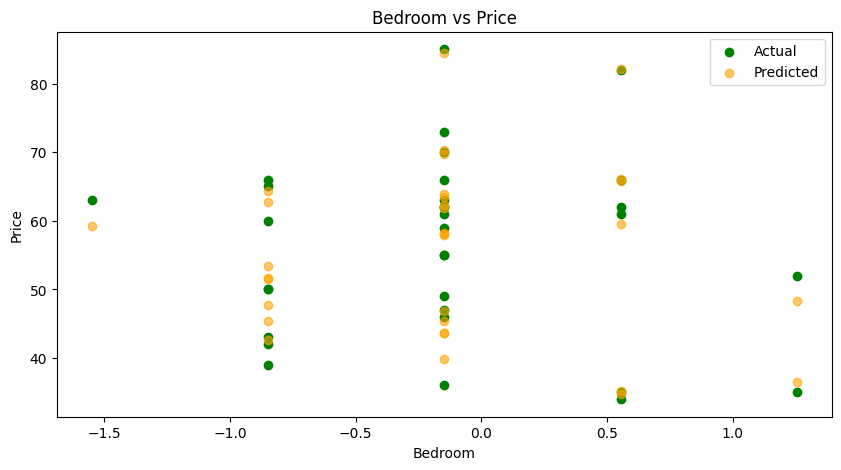

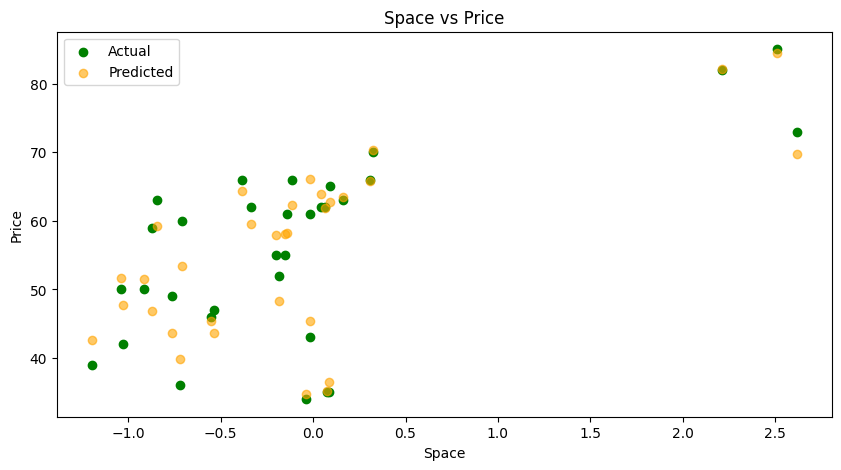

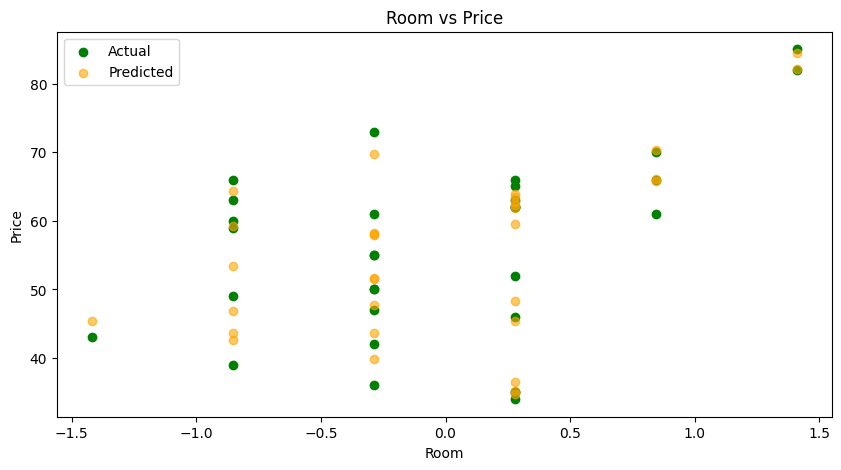

In [18]:
# 3. Optional: Feature vs. Target Scatter Plots
# Here, we plot one or more features against the target (Price) to see their relationships
for column in X.columns[:3]:  # Select first 3 features for visualization
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test[:, X.columns.get_loc(column)], y_test, color="green", label="Actual")
    plt.scatter(X_test[:, X.columns.get_loc(column)], y_pred, color="orange", alpha=0.6, label="Predicted")
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.legend()
    plt.title(f'{column} vs Price')
    plt.show()